In [1]:
import os
import pandas as pd
import math

# COMBINATION
comb = 'Co3'

# folder path
dir_path  = '/media/cecilia/DISCO2/mogp_with_terms_results/'+comb+ "/"
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

topicos = os.listdir(dir_path)

#test
#topicos = [topicos[0], topicos[1]]
print(topicos)

['1', '134', '187', '215', '221', '25', '259', '289', '350', '363', '37', '403', '418', '428', '465', '476', '528', '529', '537', '538', '556', '561', '58', '586', '99']


JACCARD SIMILARITY

In [2]:
df_ave_data = pd.DataFrame(columns=['topic', '1','2','3', '4', '5'])

for t in topicos:    
    files = os.listdir( "".join( [dir_path,"/", t]))
        
    # inserto nro de topico
    row = [t]

    for f in sorted(files):
        if "_EVALUATION_GEN_1__meanJaccardIndex.txt" in f:
                        
            run = f.split('_')[1] # nro de run
            path_pr = "".join([dir_path,"/", t,"/", f])
            
            # read text file into pandas DataFrame
            df_metric = pd.read_csv(path_pr, header=None, sep='\s+')
                                            
            mean = df_metric.mean(numeric_only=True, axis=0)

            # mean es un df, asi que acceder a columna 0
            row.append(mean[0])            
    
    
    # df con promedio de la ultima poblacion de JAccard de cada corrida para cada topico
    # en realidad como es poblacional es 1 solo valor por corrida
    #    topic         1         2       3           4      5        
    #       1      0.677144  0.802831  0.755010  0.631885  0.841196
    #       134    0.810832  0.928961  0.913061  0.908085  0.913908
    df_ave_data = pd.concat([pd.DataFrame([row], columns=df_ave_data.columns), df_ave_data], ignore_index=True)



# set the 'topic' column as index
df_ave_data.set_index('topic', inplace=True)
df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)

df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'co3_jaccardSimilarity_evaluation_by_run_gen_1.csv')

df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
1,0.137716,0.153546,0.174230,0.216431,0.121909,0.134474,0.153005,0.214591,0.190556,0.129138,...,0.154866,0.124268,0.137428,0.223883,0.082409,0.103899,0.170316,0.083905,0.105299,0.202705
2,0.130630,0.152324,0.119061,0.246920,0.099047,0.134854,0.146744,0.171816,0.166062,0.131882,...,0.154420,0.117613,0.131065,0.250081,0.058151,0.123475,0.156364,0.088035,0.112554,0.220747
3,0.147221,0.159276,0.079180,0.240769,0.081416,0.125613,0.163226,0.195876,0.153194,0.123508,...,0.185132,0.087542,0.131655,0.226088,0.068602,0.137972,0.174854,0.072913,0.123892,0.181975
4,0.146579,0.178608,0.108637,0.223706,0.079490,0.123928,0.136745,0.189144,0.165908,0.136815,...,0.161785,0.096378,0.128784,0.213818,0.063590,0.123621,0.157183,0.091546,0.112544,0.246739
5,0.113709,0.163567,0.085895,0.233731,0.066306,0.145924,0.149371,0.207192,0.169352,0.118692,...,0.158439,0.127422,0.149041,0.213626,0.075202,0.124314,0.150838,0.080762,0.108586,0.191463


In [3]:
stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.135171,0.161464,0.113400,0.232311,0.089634,0.132959,0.149818,0.195724,0.169014,0.128007,...,0.162928,0.110645,0.135595,0.225499,0.069591,0.122656,0.161911,0.083432,0.112575,0.208726
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
std,0.013812,0.010599,0.037691,0.012382,0.021476,0.008796,0.009624,0.016601,0.013535,0.007086,...,0.012766,0.017698,0.008164,0.014872,0.009535,0.012153,0.010172,0.007159,0.007017,0.025687


In [4]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.135171,5.0,0.013812
134,0.161464,5.0,0.010599
187,0.113400,5.0,0.037691
215,0.232311,5.0,0.012382
221,0.089634,5.0,0.021476
25,0.132959,5.0,0.008796
259,0.149818,5.0,0.009624
289,0.195724,5.0,0.016601
350,0.169014,5.0,0.013535
363,0.128007,5.0,0.007086


In [5]:
print(stats_all_topics['mean'].describe().transpose())


t = pd.DataFrame({  'mean_js': [stats_all_topics['mean'].mean()],                    
                    'count_js': [stats_all_topics['mean'].count()],
                    'std_js': [stats_all_topics['mean'].std()]})

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_js'] = ci95_lo
t['ci95_hi_js'] = ci95_hi


t.to_csv(save_path + 'co3_jaccardSimilarity_evaluation_stats_gen_1.csv')
t

count    25.000000
mean      0.152496
std       0.057473
min       0.069591
25%       0.113400
50%       0.135595
75%       0.169014
max       0.290586
Name: mean, dtype: float64


,mean_js,count_js,std_js,ci95_lo_js,ci95_hi_js
0,0.152496,25,0.057473,0.129966,0.175025


Text(0.5, 0.98, 'Jaccard Similarity  - Co3')

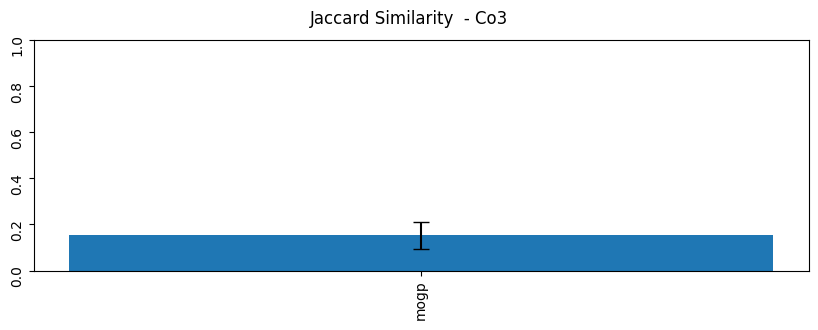

In [6]:
######### JACCARD
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('mogp', t['mean_js'], yerr=t['std_js'], capsize=6)
axs.set_ylim(0,1)
fig.suptitle('Jaccard Similarity  - '+ comb)